In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('PERSUADE_NLP_indices.csv', low_memory=False, index_col=False)
df = df.drop(['Unnamed: 0', 'essay_id', 'filename'], axis='columns')


In [3]:
df_task = pd.read_csv('../persuade_corpus_corrected.csv', low_memory=False)[['essay_id_comp', 'task']].drop_duplicates()
df = pd.merge(df_task, df, on='essay_id_comp')

In [4]:
df = df[df['holistic_score_adjudicated'] > 4]
print(len(df))
print(len(df.columns))

4170
1806


In [5]:
# This is a function to remove all columns with more than 20% zeros in them
# Input a dataframe, output a dataframe with fewer columns

def ZeroRemover(df):
    columns_to_drop = []
    for column in df.columns:
        # Count zeros in each column
        count = (df[column] == 0).sum()
        # If the counts are more than 20% the length of the column, add the column to a list of columns to drop
        if count > len(df)*0.2:
            columns_to_drop.append(column)
    # Print the columns
    for column in columns_to_drop:
        print(column)
    # Drop the columns are return the dataframe
    df = df.drop(columns_to_drop, axis='columns')
    return(df)


df = ZeroRemover(df)
print(len(df.columns))

Admiration/Awe_GALC
Amusement_GALC
Anger_GALC
Anxiety_GALC
Beingtouched_GALC
Boredom_GALC
Compassion_GALC
Contempt_GALC
Contentment_GALC
Desperation_GALC
Disappointment_GALC
Disgust_GALC
Dissatisfaction_GALC
Envy_GALC
Fear_GALC
Feelinglove_GALC
Gratitude_GALC
Guilt_GALC
Happiness_GALC
Hatred_GALC
Hope_GALC
Humility_GALC
Interest/Enthusiasm_GALC
Irritation_GALC
Jealousy_GALC
Joy_GALC
Longing_GALC
Lust_GALC
Pleasure/Enjoyment_GALC
Pride_GALC
Relaxation/Serenity_GALC
Relief_GALC
Sadness_GALC
Shame_GALC
Surprise_GALC
Tension/Stress_GALC
Positive_GALC
Negative_GALC
Pleasur_GI
Pain_GI
Feel_GI
Exch_GI
Milit_GI
Relig_GI
Race_GI
Kin_2_GI
Male_GI
Female_GI
Nonadlt_GI
Ani_GI
Region_GI
Route_GI
Aquatic_GI
Land_GI
Sky_GI
Food_GI
Vehicle_GI
Bldgpt_GI
Bodypt_GI
Say_GI
Decreas_GI
Stay_GI
Rise_GI
Fall_GI
Think_GI
Eval_2_GI
Ord_GI
Dist_GI
Color_GI
Self_GI
Our_GI
You_GI
No_GI
Ipadj_GI
Indadj_GI
Powends_Lasswell
Powaren_Lasswell
Powaupt_Lasswell
Powpt_Lasswell
Powdoct_Lasswell
Powauth_Lasswell
Rcrelig_Las

In [6]:
df.columns

Index(['essay_id_comp', 'task', 'holistic_score_adjudicated', 'nwords',
       'Anger_EmoLex', 'Anticipation_EmoLex', 'Disgust_EmoLex', 'Fear_EmoLex',
       'Joy_EmoLex', 'Negative_EmoLex',
       ...
       'mag_av_construction_freq_log_stdev',
       'mag_av_lemma_construction_freq_log_stdev',
       'fic_av_lemma_freq_log_stdev', 'fic_av_construction_freq_log_stdev',
       'fic_av_lemma_construction_freq_log_stdev', 'error_count', 'word_count',
       'error_count_per_100_words', 'misspelling',
       'misspelling_per_100_words'],
      dtype='object', length=1168)

In [7]:
# Shapiro test each of the columns SKEW 2 KURTOSIS 3 USE SCIPY.STATS
# This removes any column with a high skew or kurtosis

from scipy.stats import skew
from scipy.stats import kurtosis

columns_to_drop = []

# Adds any column with skew of > 2 to a list of columns to drop
print('SKEW')
for column in df.columns[3:]:
    if abs(skew(df[column])) > 2:
        print(column, '=', skew(df[column]))
        columns_to_drop.append(column)

# Adds any column with a kurtosis of > 3 to a list of columns to drop
print('KURTOSIS')
for column in df.columns[3:]:
    if abs(kurtosis(df[column])) > 3:
        print(column, '=', kurtosis(df[column]))   
        columns_to_drop.append(column)

 

df = df.drop(list(set(columns_to_drop,)), axis = 'columns')

print(len(df.columns))

SKEW
Anger_EmoLex = 2.0818879131149446
Surprise_EmoLex = 2.0850422478230852
hu_liu_prop = 5.414307929451811
Polit_2_GI = 4.0033076944454935
Polit_GI = 2.7669943335458935
Comnobj_GI = 2.2431018292374034
Goal_GI = 2.5270870879956155
Exert_GI = 2.094683130616318
Name_GI = 2.20832947835647
Powcoop_Lasswell = 2.8679797856426714
Powtot_Lasswell = 2.248957610172242
Affgain_Lasswell = 2.918478099511031
Wltoth_Lasswell = 2.3289014167738564
Wlttot_Lasswell = 2.3177030969041033
Wlbpsyc_Lasswell = 2.392016919681472
politeness_component = 3.5457126576499562
adjacent_overlap_binary_all_sent = -2.4350321712320007
adjacent_overlap_binary_2_all_sent = -4.1012424317576555
adjacent_overlap_binary_2_fw_sent = -2.9457770760661153
adjacent_overlap_binary_all_para = -3.306646039106453
adjacent_overlap_binary_2_all_para = -4.551225735907639
adjacent_overlap_binary_cw_para = -2.7872969655257274
adjacent_overlap_binary_2_cw_para = -3.9219483065933236
adjacent_overlap_binary_fw_para = -2.9522448029343042
adjacen

In [8]:
# This finds variables that are colinear and removes all but the one most correlated to the dependent variable 
def pruner(dataframe, depVar, limit):
    df1 = dataframe
    rows_to_drop = []
    # Makes a correlation table
    cor_table = df1.corr()
    # Iterates through each column of the correlation table
    counter = 0
    # Drops columns with correlation to dependent variable of < 0.1
    for var in cor_table.columns:
        if abs(cor_table.loc[depVar][var]) < 0.1:
            df1 = df1.drop(var, axis='columns')
#             print(var, cor_table.loc[depVar][var])
            counter += 1
    print('dropping', counter, 'variables due to weak correlation')
    print(len(df1.columns), 'columns left')
    cor_table = df1.corr()        
    for var in cor_table.columns:
        if var != depVar:
            # Iterates through rows where the r value is higher than 0.7
            for row in list(cor_table[abs(cor_table[var]) > limit].index):
                # Ignores cases where the row and column are the same
                if row != var and row != depVar:
                    # If the absolute value of the correlation between the row variable 
                    # and the dependent variable is less than that of the column variable,
                    # add the row to a list of rows to drop.
                    ind_value = cor_table.loc[depVar][row]
                    dep_value = cor_table.loc[depVar][var]
                    if abs(cor_table.loc[depVar][row]) < abs(cor_table.loc[depVar][var]):               
                        rows_to_drop.append(row)
#                         print(row, var, cor_table.loc[row][var])
#                         print(row, abs(cor_table.loc[depVar][row]), '<', var, abs(cor_table.loc[depVar][var]), var)
                    else:
                        rows_to_drop.append(var)
#                         print(row, var, cor_table.loc[row][var])
#                         print(row, cor_table.loc[depVar][row], '>', var, abs(cor_table.loc[depVar][var]), var)

    # Take set of the rows to drop and return that list
    rows_to_drop = list(set(rows_to_drop))
    print('dropping', len(rows_to_drop), 'columns due to collinearity')
    df1 = df1.drop(rows_to_drop, axis='columns')
    print(len(df1.columns), 'columns left')
    return(df1)

In [9]:
df_pruned = pruner(df, 'holistic_score_adjudicated', 0.7)
print(len(df_pruned))

dropping 683 variables due to weak correlation
337 columns left
dropping 283 columns due to collinearity
54 columns left
4170


array([[<AxesSubplot:title={'center':'holistic_score_adjudicated'}>,
        <AxesSubplot:title={'center':'Positive_EmoLex'}>,
        <AxesSubplot:title={'center':'Trust_EmoLex'}>,
        <AxesSubplot:title={'center':'Arousal'}>,
        <AxesSubplot:title={'center':'Positiv_GI'}>,
        <AxesSubplot:title={'center':'Affil_GI'}>,
        <AxesSubplot:title={'center':'Hostile_GI'}>],
       [<AxesSubplot:title={'center':'Undrst_GI'}>,
        <AxesSubplot:title={'center':'Academ_GI'}>,
        <AxesSubplot:title={'center':'Doctrin_GI'}>,
        <AxesSubplot:title={'center':'Abs_GI'}>,
        <AxesSubplot:title={'center':'Dav_GI'}>,
        <AxesSubplot:title={'center':'Rcethic_Lasswell'}>,
        <AxesSubplot:title={'center':'Trngain_Lasswell'}>],
       [<AxesSubplot:title={'center':'objects_component'}>,
        <AxesSubplot:title={'center':'adjacent_overlap_2_fw_sent_div_seg'}>,
        <AxesSubplot:title={'center':'adjacent_overlap_2_noun_sent_div_seg'}>,
        <AxesSubplot

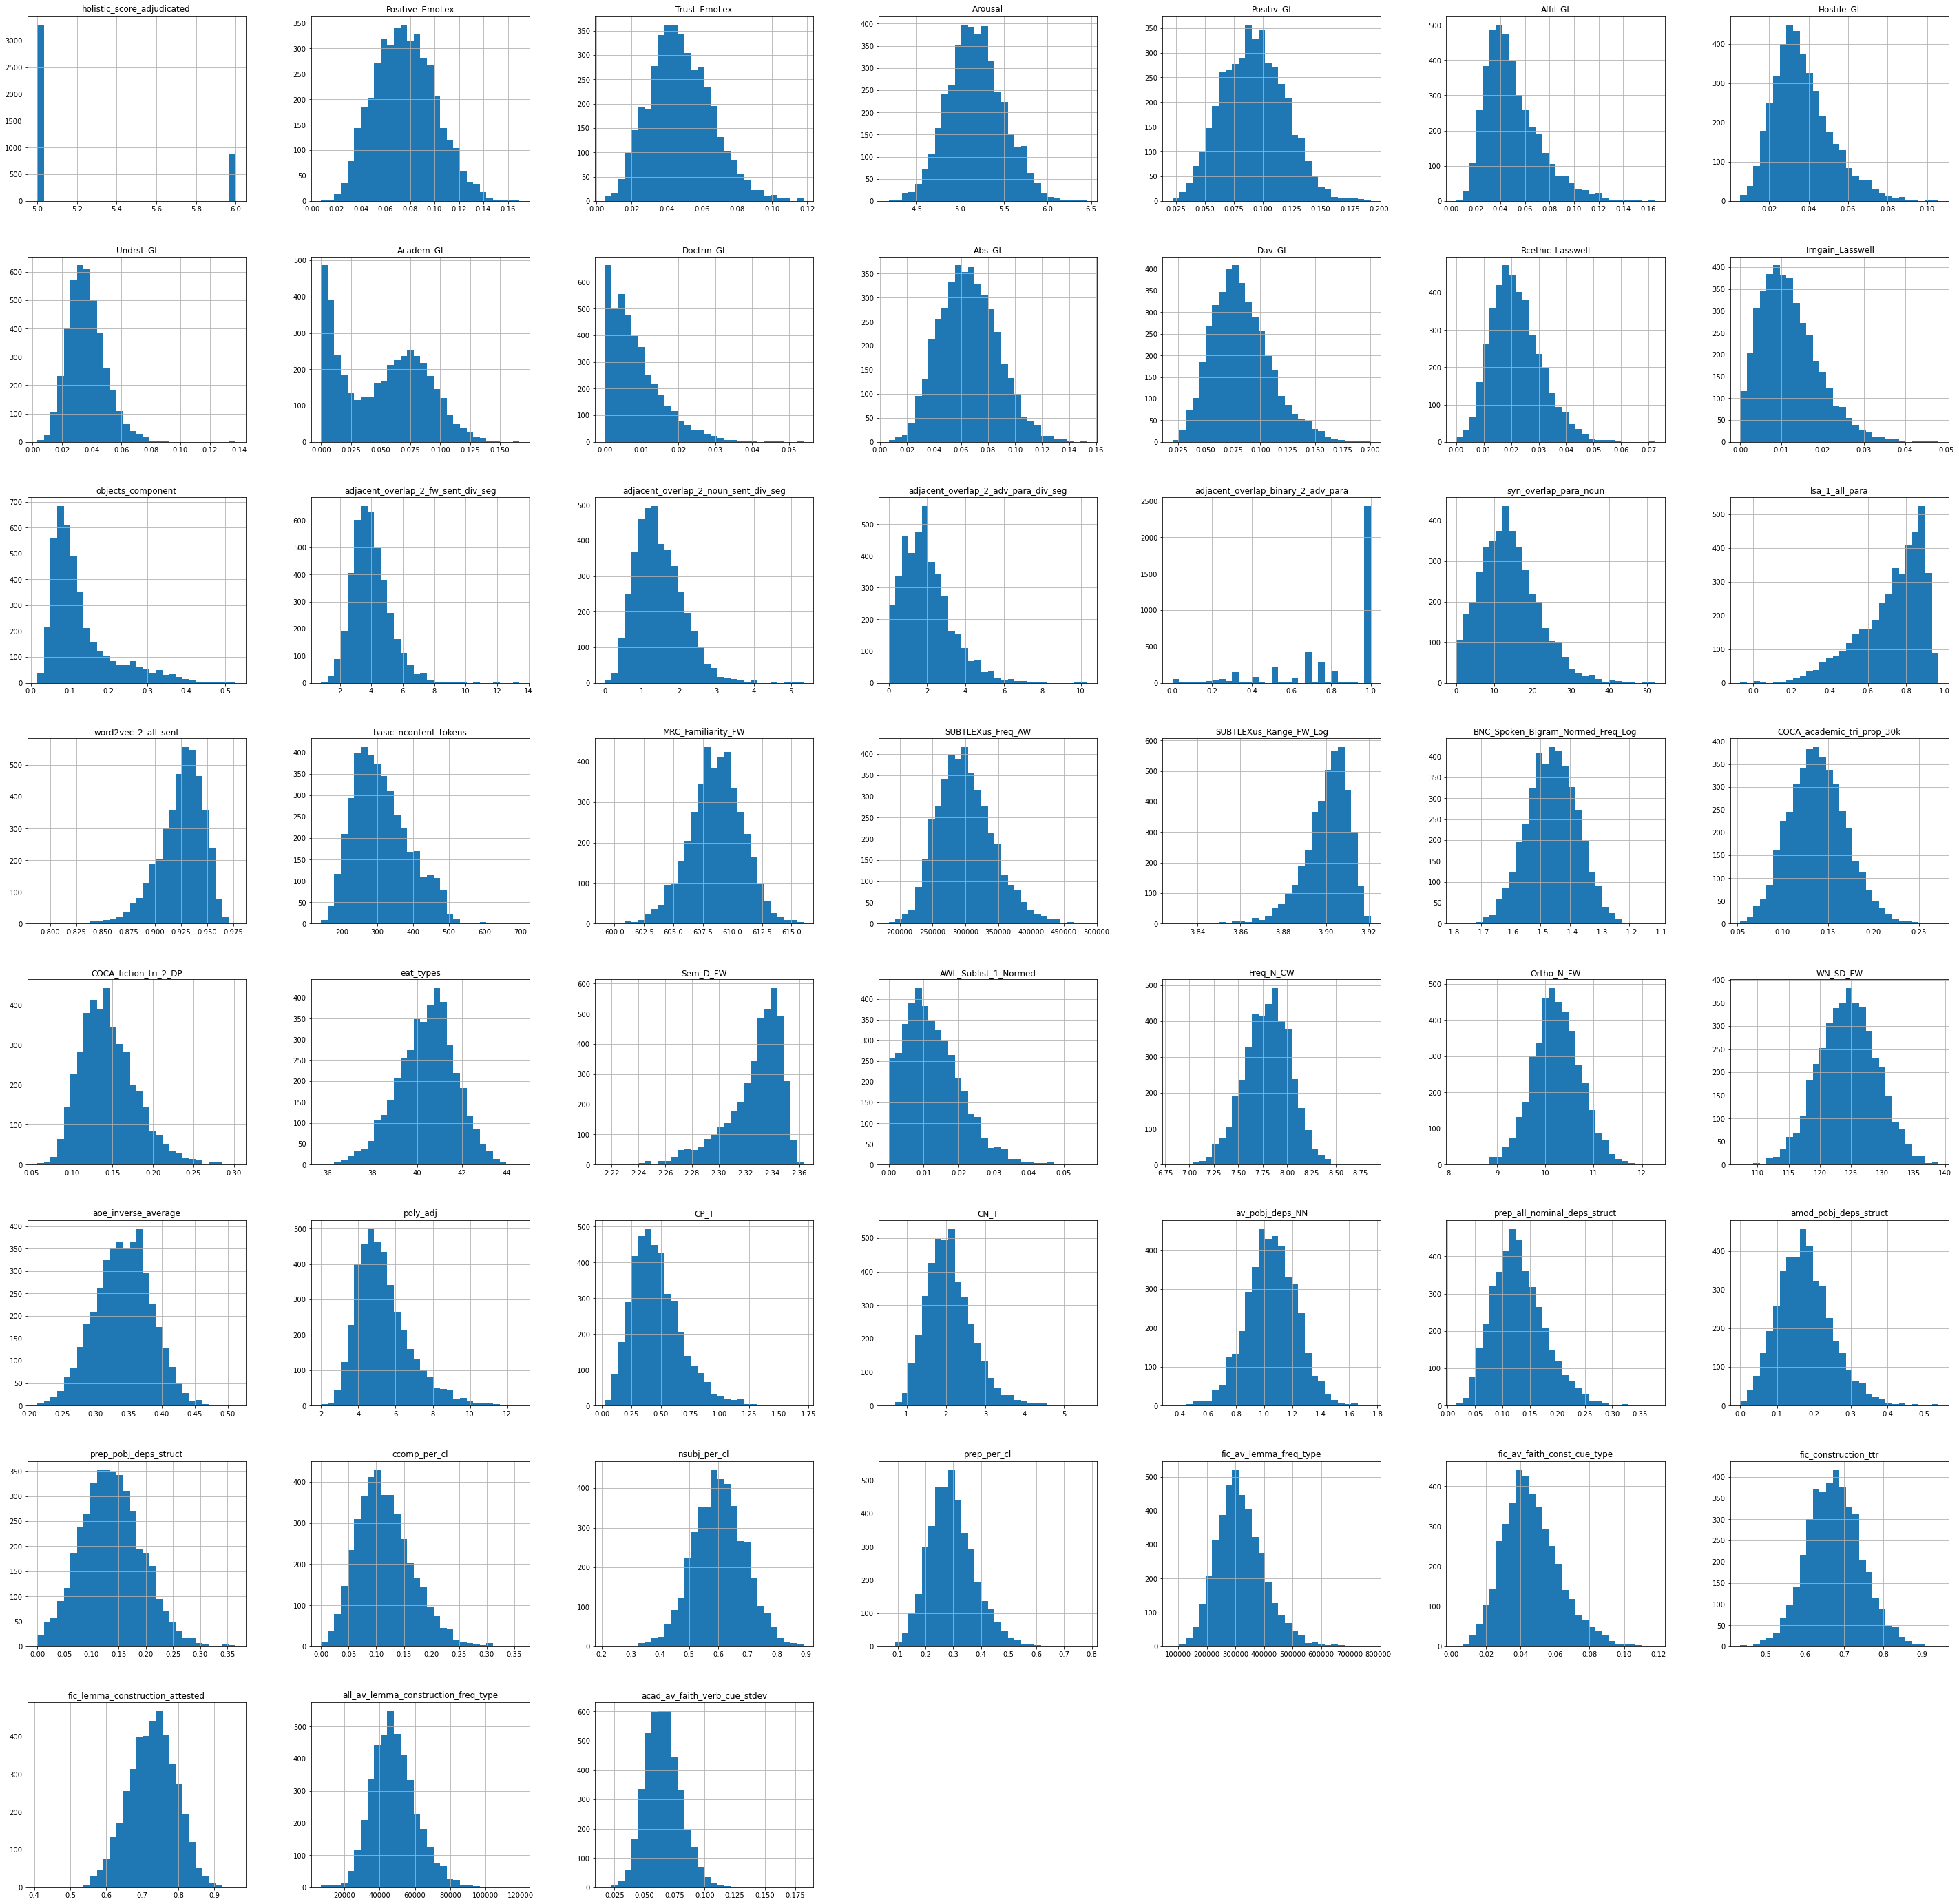

In [10]:
#Histogram of retained clusters
df_pruned.hist(bins=30, figsize=(50, 50))

In [11]:
# Corelation matrix
print(df_pruned.columns)
df_pruned.corr().sort_values(by='holistic_score_adjudicated', ascending = False)

Index(['essay_id_comp', 'task', 'holistic_score_adjudicated',
       'Positive_EmoLex', 'Trust_EmoLex', 'Arousal', 'Positiv_GI', 'Affil_GI',
       'Hostile_GI', 'Undrst_GI', 'Academ_GI', 'Doctrin_GI', 'Abs_GI',
       'Dav_GI', 'Rcethic_Lasswell', 'Trngain_Lasswell', 'objects_component',
       'adjacent_overlap_2_fw_sent_div_seg',
       'adjacent_overlap_2_noun_sent_div_seg',
       'adjacent_overlap_2_adv_para_div_seg',
       'adjacent_overlap_binary_2_adv_para', 'syn_overlap_para_noun',
       'lsa_1_all_para', 'word2vec_2_all_sent', 'basic_ncontent_tokens',
       'MRC_Familiarity_FW', 'SUBTLEXus_Freq_AW', 'SUBTLEXus_Range_FW_Log',
       'BNC_Spoken_Bigram_Normed_Freq_Log', 'COCA_academic_tri_prop_30k',
       'COCA_fiction_tri_2_DP', 'eat_types', 'Sem_D_FW',
       'AWL_Sublist_1_Normed', 'Freq_N_CW', 'Ortho_N_FW', 'WN_SD_FW',
       'aoe_inverse_average', 'poly_adj', 'CP_T', 'CN_T', 'av_pobj_deps_NN',
       'prep_all_nominal_deps_struct', 'amod_pobj_deps_struct',
       'pre

,holistic_score_adjudicated,Positive_EmoLex,Trust_EmoLex,Arousal,Positiv_GI,Affil_GI,Hostile_GI,Undrst_GI,Academ_GI,Doctrin_GI,...,prep_pobj_deps_struct,ccomp_per_cl,nsubj_per_cl,prep_per_cl,fic_av_lemma_freq_type,fic_av_faith_const_cue_type,fic_construction_ttr,fic_lemma_construction_attested,all_av_lemma_construction_freq_type,acad_av_faith_verb_cue_stdev
holistic_score_adjudicated,1.000000,0.160343,0.103505,-0.122061,0.116440,-0.112010,-0.134878,-0.131949,0.188396,0.129211,...,0.105723,-0.100776,-0.119183,0.101916,-0.134307,-0.100573,-0.144559,-0.135857,-0.224646,0.115023
basic_ncontent_tokens,0.483858,0.107268,0.065126,-0.087691,0.131144,-0.033782,-0.124381,-0.104715,0.176314,0.038783,...,0.091956,-0.117450,-0.154953,0.104845,-0.285002,-0.055546,-0.379404,-0.099810,-0.549187,0.086107
syn_overlap_para_noun,0.281210,0.215560,0.180750,-0.204510,0.183699,-0.096861,-0.262489,-0.189139,0.374368,-0.013736,...,0.078547,-0.107203,-0.087773,0.069973,-0.174174,-0.058315,-0.302264,-0.062871,-0.248088,0.106286
aoe_inverse_average,0.251622,0.506750,0.254705,-0.202977,0.197096,-0.395479,-0.479057,-0.338359,0.400879,0.310661,...,0.241905,-0.271836,-0.257895,0.145291,-0.181588,-0.289775,-0.053358,-0.327425,0.121533,0.342545
Academ_GI,0.188396,0.460043,0.390984,-0.551422,0.478474,-0.113683,-0.380672,-0.403211,1.000000,0.276282,...,-0.048709,-0.168863,-0.166039,0.144614,-0.220308,-0.101400,-0.044947,-0.103643,-0.113815,0.092364
CN_T,0.174717,0.200811,0.115334,0.003008,0.022866,-0.182186,-0.222295,-0.146051,0.040283,0.138925,...,0.397056,-0.053727,-0.247015,0.240336,-0.084855,-0.192933,-0.000195,-0.313222,0.052374,0.200070
COCA_fiction_tri_2_DP,0.174580,0.278542,0.120065,-0.074225,0.121879,-0.285782,-0.204871,-0.267423,0.241596,0.279638,...,0.278967,-0.387584,-0.396653,0.243578,-0.192004,-0.313473,0.019781,-0.338264,0.065987,0.310345
Positive_EmoLex,0.160343,1.000000,0.617027,-0.096421,0.525075,-0.027366,-0.443918,-0.270703,0.460043,0.220947,...,0.097075,-0.097781,-0.116059,0.049359,-0.288214,-0.229507,-0.088818,-0.159811,0.010926,0.224781
adjacent_overlap_2_adv_para_div_seg,0.160305,-0.050844,-0.039189,-0.033474,0.059831,0.016299,-0.035736,0.130532,0.028321,-0.089523,...,-0.026283,0.032262,0.073023,-0.066022,0.047664,0.092193,-0.127505,0.031417,-0.217056,-0.047192
eat_types,0.143881,0.404289,0.322076,-0.195621,0.280355,-0.198134,-0.323244,-0.323924,0.526345,0.271696,...,0.182547,-0.299140,-0.262453,0.154916,-0.224442,-0.278716,-0.040852,-0.205734,0.050188,0.224285


In [12]:
###CLUSTERING

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [13]:
# This uses the normalize() function. Ignore it.
from sklearn.preprocessing import normalize
data = df_pruned.set_index('essay_id_comp')

data = data.iloc[:,2:]
scaled_data = normalize(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_df
#array = df.iloc[:,3:].to_numpy()

,Positive_EmoLex,Trust_EmoLex,Arousal,Positiv_GI,Affil_GI,Hostile_GI,Undrst_GI,Academ_GI,Doctrin_GI,Abs_GI,...,prep_pobj_deps_struct,ccomp_per_cl,nsubj_per_cl,prep_per_cl,fic_av_lemma_freq_type,fic_av_faith_const_cue_type,fic_construction_ttr,fic_lemma_construction_attested,all_av_lemma_construction_freq_type,acad_av_faith_verb_cue_stdev
0,1.209625e-07,5.864850e-08,0.000012,1.099659e-07,5.131744e-08,1.722800e-07,9.896934e-08,7.331062e-09,2.199319e-08,1.392902e-07,...,4.895521e-07,2.447760e-07,1.134871e-06,8.678423e-07,0.716934,1.032770e-07,0.000002,1.268385e-06,0.128922,9.502820e-08
1,4.100253e-08,1.025063e-08,0.000007,7.175443e-08,1.793861e-08,9.738101e-08,5.381582e-08,0.000000e+00,5.125316e-09,9.225569e-08,...,1.623753e-07,1.921994e-08,8.648971e-07,5.381582e-07,0.920246,2.784593e-08,0.000001,9.609968e-07,0.107267,6.127961e-08
2,1.341263e-07,8.143384e-08,0.000013,1.724481e-07,7.185339e-08,1.724481e-07,6.706316e-08,0.000000e+00,1.437068e-08,1.676579e-07,...,5.290075e-07,1.793057e-07,1.716212e-06,5.635323e-07,0.754497,7.764984e-08,0.000002,1.946748e-06,0.143435,1.408299e-07
3,1.134152e-07,5.475216e-08,0.000013,1.329695e-07,6.648476e-08,1.681673e-07,1.095043e-07,7.430650e-08,3.519781e-08,2.268304e-07,...,2.900300e-07,3.604174e-07,1.314463e-06,7.632368e-07,0.751602,6.698080e-08,0.000001,1.674881e-06,0.151166,1.827980e-07
4,4.747672e-08,3.351298e-08,0.000009,9.774619e-08,6.702596e-08,1.396374e-07,1.256737e-07,8.378245e-09,2.513474e-08,9.774619e-08,...,2.656397e-07,2.199289e-07,1.070321e-06,4.985056e-07,0.789412,6.243207e-08,0.000001,1.114307e-06,0.080398,9.156806e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,1.199674e-07,9.088443e-08,0.000010,2.072165e-07,1.345090e-07,8.724905e-08,1.308736e-07,2.181226e-08,0.000000e+00,1.054259e-07,...,2.731726e-07,2.909882e-07,1.434156e-06,5.611916e-07,0.684438,8.081334e-08,0.000001,1.621220e-06,0.100386,9.837799e-08
4166,9.580000e-08,1.241852e-07,0.000011,1.986963e-07,1.880518e-07,7.451111e-08,7.096296e-08,3.548148e-09,0.000000e+00,9.934814e-08,...,2.017209e-07,3.107318e-07,1.263642e-06,7.250408e-07,0.693925,9.911361e-08,0.000002,1.512228e-06,0.113912,7.790299e-08
4167,6.430478e-08,6.430478e-08,0.000008,8.387580e-08,8.946752e-08,5.312134e-08,1.062427e-07,0.000000e+00,5.591720e-09,6.150892e-08,...,2.464830e-07,1.354302e-07,9.987979e-07,4.232195e-07,0.790471,1.415794e-07,0.000001,1.168086e-06,0.089086,9.345624e-08
4168,1.070742e-07,1.018932e-07,0.000010,1.709733e-07,1.277982e-07,5.526409e-08,1.018932e-07,2.245104e-08,3.454005e-09,1.001662e-07,...,2.688179e-07,2.513087e-07,1.162303e-06,6.178005e-07,0.756986,1.249877e-07,0.000001,1.329842e-06,0.071951,1.225218e-07


In [14]:
#Write the data to a file
df_pruned.to_csv('index_data.csv')

In [15]:
#This uses standardscaler() to normalize the data. It is better.
scalar = StandardScaler()
scaled_array = scalar.fit_transform(data)
scaled_df = pd.DataFrame(scaled_array, columns = data.columns)
scaled_df

,Positive_EmoLex,Trust_EmoLex,Arousal,Positiv_GI,Affil_GI,Hostile_GI,Undrst_GI,Academ_GI,Doctrin_GI,Abs_GI,...,prep_pobj_deps_struct,ccomp_per_cl,nsubj_per_cl,prep_per_cl,fic_av_lemma_freq_type,fic_av_faith_const_cue_type,fic_construction_ttr,fic_lemma_construction_attested,all_av_lemma_construction_freq_type,acad_av_faith_verb_cue_stdev
0,-0.857732,-1.214877,0.494400,-1.573664,-1.203779,2.804192,0.670212,-1.347682,0.217193,-0.128682,...,1.526000,-0.087626,-0.985464,1.194321,0.080726,0.036868,1.700865,-2.315867,0.804758,-1.500150
1,-1.851851,-2.287703,-0.018852,-1.446537,-1.654480,2.407881,0.275039,-1.441922,-0.650467,0.119831,...,-0.287364,-2.020851,0.471246,1.267736,4.331508,-1.571358,1.308232,-0.209768,2.479448,-1.336075
2,-0.849203,-0.828597,0.470669,-0.794150,-0.921759,2.304766,-0.723174,-1.441922,-0.355901,0.135002,...,1.439720,-0.834895,1.183098,-0.772432,-0.101641,-0.882675,-0.690175,1.093381,0.838103,-0.497495
3,-1.182547,-1.438922,0.548594,-1.383919,-1.013132,2.217169,0.700888,-0.571265,0.860822,1.295532,...,-0.299681,0.671319,-0.657996,0.247652,-0.090721,-1.140415,-0.942383,-0.533650,1.122480,0.710839
4,-1.915514,-1.565695,0.893312,-1.216192,-0.410990,3.269185,3.206113,-1.297436,0.965244,-0.300953,...,0.446233,0.367949,0.573092,0.099649,1.921656,-0.507434,0.403795,-0.752747,0.049661,-0.641146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4165,-0.539174,-0.034619,-0.300381,0.601164,0.924933,0.586743,2.557039,-1.118889,-1.185851,-0.505156,...,0.108546,0.732237,1.693401,-0.022615,0.465936,-0.246823,1.081499,1.820501,0.329088,-0.934676
4166,-1.191204,0.700712,0.040830,0.174029,1.891080,-0.045989,-0.158069,-1.392927,-1.185851,-0.816300,...,-0.686158,0.719085,0.166736,0.704887,0.233960,0.125808,0.873010,0.141249,0.569693,-1.850546
4167,-1.393448,-0.361280,0.542603,-1.405118,0.369948,-0.171880,2.599119,-1.441922,-0.675730,-1.212336,...,0.414716,-0.550820,0.533921,-0.249779,2.305737,2.802273,0.300852,0.458514,0.750059,-0.307499
4168,-0.700703,0.439356,0.842589,0.060653,0.915882,-0.454443,1.552732,-1.092964,-0.919428,-0.512447,...,0.192199,0.447863,0.415055,0.529787,1.148107,1.370894,-0.694829,0.027395,-0.698048,0.140241


In [16]:
#Adds inertia values to a list, then charts the SSE of different numbers of clusters
SSE = []
for k in range(1,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df)
    SSE.append(kmeans.inertia_)
plt.style.use('fivethirtyeight')
plt.plot(range(1,20), SSE)
plt.xticks(range(1,20))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f0baa1ba0d0>
Traceback (most recent call last):
  File "/home/dad/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/dad/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/dad/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/dad/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

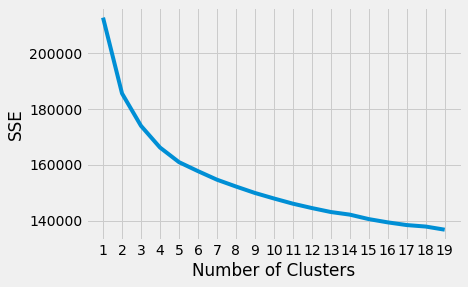

In [18]:
#Adds silhouet
silhouette_coefficients = []

for k in range (2,20):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

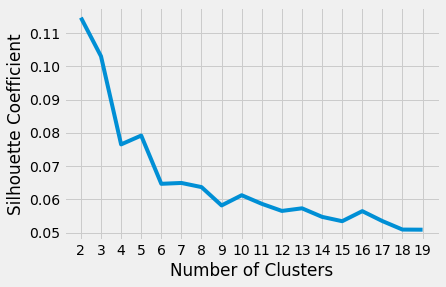

In [19]:
plt.style.use('fivethirtyeight')
plt.plot(range(2,20), silhouette_coefficients)
plt.xticks(range(2,20))
plt.xlabel('Number of Clusters')
plt.ylabel("Silhouette Coefficient")
plt.show()

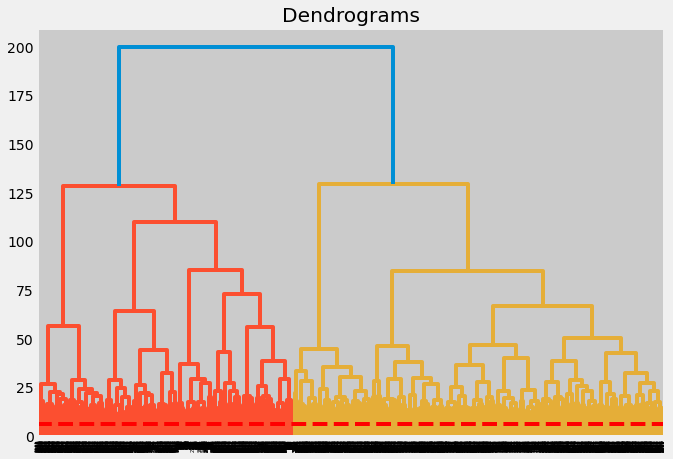

In [20]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(scaled_df, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

In [21]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(scaled_df)

array([0, 0, 0, ..., 3, 1, 3])

In [22]:
plt.figure(figsize=(10, 7))  
plt.scatter(scaled_df['modal_per_cl'], scaled_df['all_av_lemma_construction_freq_type'], c=cluster.labels_) 

KeyError: 'modal_per_cl'

<Figure size 720x504 with 0 Axes>